Simulation scenario #6 (Index 6.2 from the simulation_scenarios document)

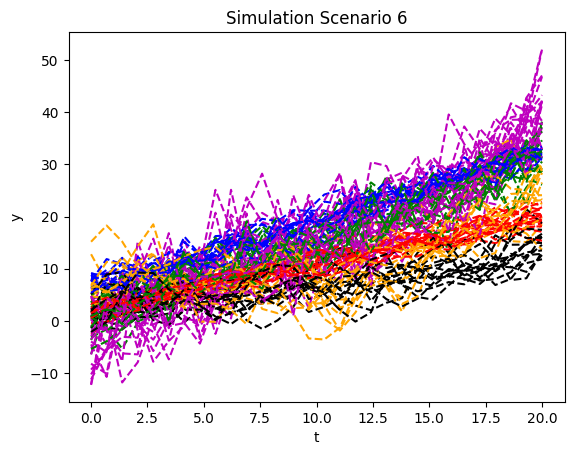

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import spatial, interpolate
from ensemble_clustering import functional_data_decomposition, functional_data_clustering
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score
from fda_results import percentage_variation_ami_ari, plot_percentage_variation_ami_ari

# Ignore convergence warnings
import warnings
warnings.filterwarnings("ignore")

# Define the exponentiated quadratic 
def exponentiated_quadratic(xa, xb):
    # L2 distance (Squared Euclidian)
    sq_norm = -0.8 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return np.exp(sq_norm)

# Sample from the Gaussian process distribution
nb_of_samples = 30  # Number of points in each function
# Independent variable samples
t = np.expand_dims(np.linspace(0, 20, nb_of_samples), 1)
Σ = exponentiated_quadratic(t, t)  # Kernel of data point
Σ2 = exponentiated_quadratic(5*t, 5*t)  # Kernel of data point
Σ3 = exponentiated_quadratic(8*t, 8*t)  # Kernel of data point

mixture_k = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
n = 100
Y = np.zeros((n, len(t)))
simulation_label = np.zeros(n)

for i in range(n):
    # generate a random number between 0 and 1
    r = np.random.rand()
    # find the index of the mixture component
    if r < mixture_k[0]:
        ys = np.reshape(t, (nb_of_samples)) + np.random.multivariate_normal(mean=np.reshape(np.cos(t/10), (nb_of_samples)), cov=Σ, size=1) + np.random.multivariate_normal(mean=np.reshape(np.sin(1 + t/10), (nb_of_samples)), cov=Σ, size=1) + np.random.normal(0, 0.08, len(t))
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='r')
        # Remember the label of the component
        simulation_label[i] = 0
    elif r < mixture_k[0] + mixture_k[1]:
        ys = -5/2 + np.reshape(t, (nb_of_samples)) + 2*np.random.multivariate_normal(mean=np.reshape(np.cos(2*t/10), (nb_of_samples)), cov=Σ, size=1) + 2*np.random.multivariate_normal(mean=np.reshape(np.sin(2 + t/10), (nb_of_samples)), cov=Σ, size=1) + np.random.normal(0, 0.08, len(t))
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='k')
        # Remember the label of the component
        simulation_label[i] = 1
    elif r < mixture_k[0] + mixture_k[1] + mixture_k[2]:
        ys = 5/2 + np.reshape(t, (nb_of_samples)) + 3*np.random.multivariate_normal(mean=np.reshape(np.cos(3*t/10), (nb_of_samples)), cov=Σ, size=1) + 3*np.random.multivariate_normal(mean=np.reshape(np.sin(3 + t/10), (nb_of_samples)), cov=Σ, size=1) + np.random.normal(0, 0.08, len(t))
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='orange')
        # Remember the label of the component
        simulation_label[i] = 2
    elif r < mixture_k[0] + mixture_k[1] + mixture_k[2] + mixture_k[3]:
        ys = 11/2 + np.reshape(t, (nb_of_samples)) + np.random.multivariate_normal(mean=np.reshape(np.sin(t/10), (nb_of_samples)), cov=Σ, size=1) + np.random.multivariate_normal(mean=np.reshape(np.cos(1 + t/10), (nb_of_samples)), cov=Σ2, size=1) + np.random.multivariate_normal(mean=np.reshape(np.square(t/10)+t/10+1, (nb_of_samples)), cov=Σ3, size=1) + np.random.normal(0, 0.08, len(t))
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='b')
        # Remember the label of the component
        simulation_label[i] = 3
    elif r < mixture_k[0] + mixture_k[1] + mixture_k[2] + mixture_k[3] + mixture_k[4]:
        ys = np.reshape(t, (nb_of_samples))  + 2*np.random.multivariate_normal(mean=np.reshape(np.sin(2*t/10), (nb_of_samples)), cov=Σ, size=1) + 2*np.random.multivariate_normal(mean=np.reshape(np.cos(2 + t/10), (nb_of_samples)), cov=Σ2, size=1) + 2*np.random.multivariate_normal(mean=np.reshape(np.square(t/10)+t/10+1, (nb_of_samples)), cov=Σ3, size=1) + np.random.normal(0, 0.08, len(t))
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='g')
        # Remember the label of the component
        simulation_label[i] = 4
    else:
        ys = -5/2 + np.reshape(t, (nb_of_samples)) + 3*np.random.multivariate_normal(mean=np.reshape(np.sin(3*t/10), (nb_of_samples)), cov=Σ, size=1) + 3*np.random.multivariate_normal(mean=np.reshape(np.cos(3 + t/10), (nb_of_samples)), cov=Σ2, size=1) + 3*np.random.multivariate_normal(mean=np.reshape(np.square(t/10)+t/10+1, (nb_of_samples)), cov=Σ3, size=1) + np.random.normal(0, 0.08, len(t))
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='m')
        # Remember the label of the component
        simulation_label[i] = 5
plt.title('Simulation Scenario 6')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

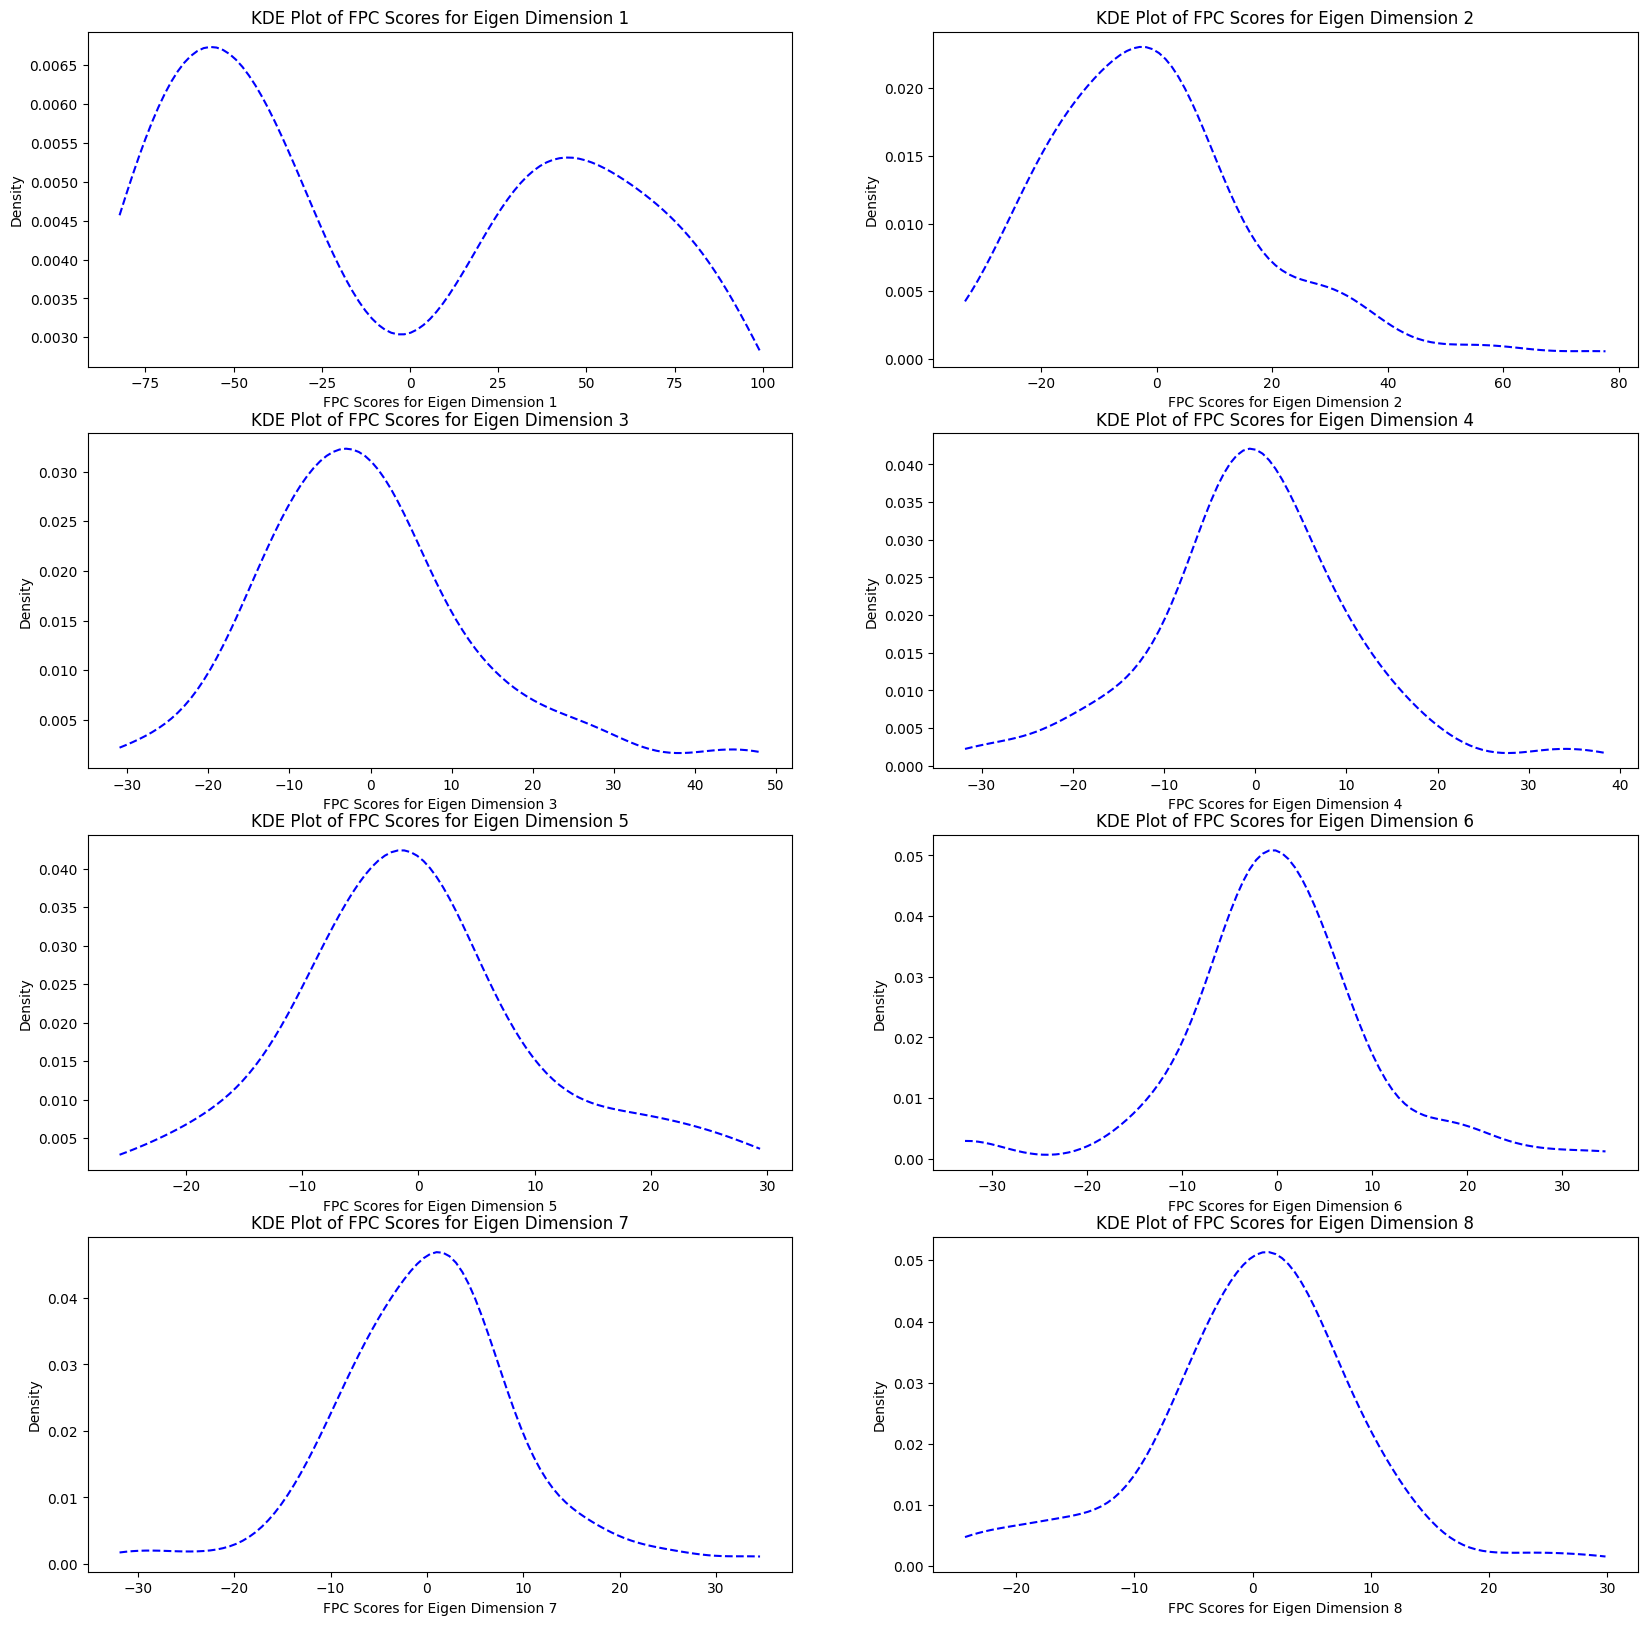

In [39]:
data_smooth, mean, principal_componenets, eigen_functions = functional_data_decomposition (Y, 10, 150)

# For loop to plot a 2x2 set of scatter plots for the kernel density plots of the first four principal components
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    # Kernel density plot for principal components[i], as a scatter plot
    # Determine the desnity of principal components[i]
    kde = scipy.stats.gaussian_kde(principal_componenets[:,i])
    # Create a grid of points
    x_grid = np.linspace(min(principal_componenets[:,i]), max(principal_componenets[:,i]), 100)
    # Evaluate the density on the grid
    density = kde(x_grid)
    # Plot the density
    ax[i//2, i%2].plot(x_grid, density, color='b', linestyle='--')
    ax[i//2, i%2].set_title('KDE Plot of FPC Scores for Eigen Dimension ' + str(i+1))
    ax[i//2, i%2].set_xlabel('FPC Scores for Eigen Dimension ' + str(i+1))
    ax[i//2, i%2].set_ylabel('Density')
plt.show()

Percentage of variation explained by each eigen dimensions:  [0.73468093 0.078832   0.04322021 0.02867788 0.02521417 0.0219608
 0.02001094 0.01818241 0.01536284 0.01385781]


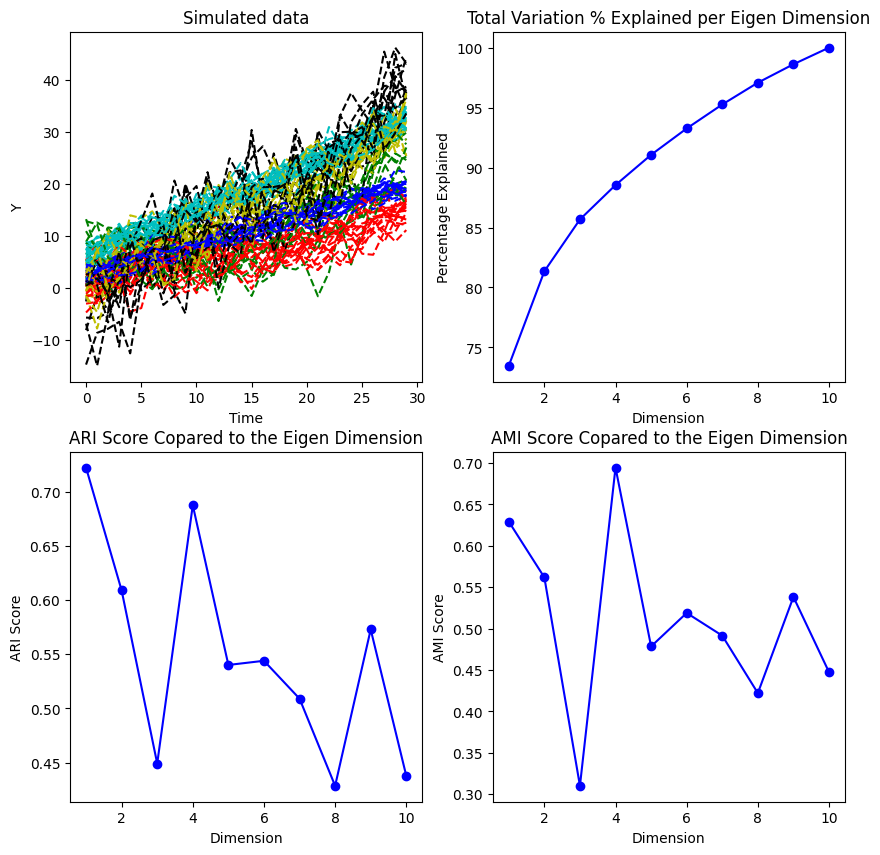

In [40]:
variance, ami, ari, v_range = percentage_variation_ami_ari(10, Y, 150, simulation_label, 6)
plot_percentage_variation_ami_ari(variance, ami, ari, v_range, simulation_label, Y)

In [41]:
# Determine the Eigen Dimension that explains 95% of the variance
for i in range(len(variance)):
    if sum(variance[:i]) >= 0.95:
        print('The Eigen Dimension that explains 95% of the variance is ' + str(i))
        V = i -1
        if V == 0:
            V = 1
        break

The Eigen Dimension that explains 95% of the variance is 7


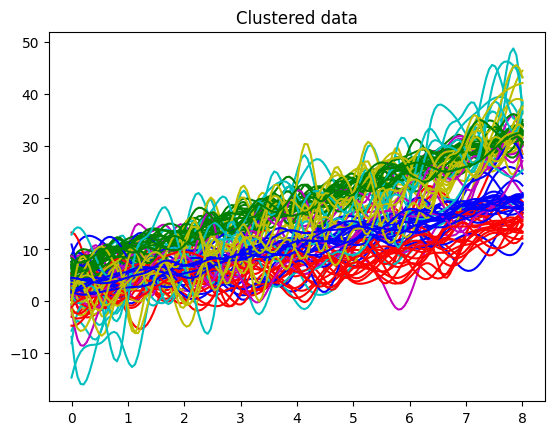

AMI score:
0.6917760384589166
ARM score:
0.6557793087626982


In [42]:
# Get data from the first function
data_smooth, mean, principal_componenets, eigen_functions = functional_data_decomposition (Y, V, 150)

# Get data from the second function
membership_matrices, labels = functional_data_clustering (principal_componenets, 6)

# Plot the curves with their labels
t = np.expand_dims(np.linspace(0, 8, len(data_smooth[0])), 1)
for i in range(len(data_smooth)):
    if labels[i] == 0:
        plt.plot(t, data_smooth[i], '-m')
    elif labels[i] == 1:
        plt.plot(t, data_smooth[i], '-g')
    elif labels[i] == 2:
        plt.plot(t, data_smooth[i], '-b')
    elif labels[i] == 3:
        plt.plot(t, data_smooth[i], '-c')
    elif labels[i] == 4:
        plt.plot(t, data_smooth[i], '-y')
    else:
        plt.plot(t, data_smooth[i], '-r')
plt.title('Clustered data')
plt.show()

# Get the AMI score
print("AMI score:")
print(adjusted_mutual_info_score(simulation_label, labels))

# Get the ARM scoree
print("ARM score:")
print(adjusted_rand_score(simulation_label, labels))

FCUBT Method

In [43]:
from FDApy.clustering.fcubt import Node, FCUBT
from FDApy.representation.functional_data import DenseFunctionalData

# Make t a dict
t = np.expand_dims(np.linspace(0, 20, len(Y[0])), 1)
t = {'input_dim_0': t}
# Change t from (100, 1) to (100,)
t = {k: v.squeeze() for k, v in t.items()}

data = DenseFunctionalData(t, Y)
# Build the tree
root_node = Node(data, is_root=True)
fcubt = FCUBT(root_node=root_node)

# Growing
fcubt.grow(n_components=0.95, min_size=10)

# Joining
fcubt.join(n_components=0.95)

# Get the ARI
print("ARI score: %f" % adjusted_rand_score(simulation_label, fcubt.labels_join))
# Get the AMI
print("AMI score: %f" % adjusted_mutual_info_score(simulation_label, fcubt.labels_join))

ARI score: 0.656487
AMI score: 0.745231


In [44]:
# Store the data in DataStore.csv
np.savetxt('Data/DataStore.csv', Y, delimiter=',')

In [45]:
import os
os.environ["R_HOME"] = r"C:\Program Files\R\R-4.2.2" # change as needed

%reload_ext rpy2.ipython

In [46]:
# Perform FunHDDC on the data

# Load packages
%R library(fda)
%R library(funHDDC)
%R library(mclust)
%R library(tidyverse)

# # Load data
%R argvals <- seq(0, 1, length.out = 30)
%R values <- t(as.matrix(read.csv('~/ProjectDocs/Project_code/simuations/Data/DataStore.csv', header = FALSE))) # nolint

# FunHDDC
%R basis <- create.bspline.basis(rangeval = c(min(argvals), max(argvals)), nbasis = 25, norder = 3) # nolint

%R data_fd <- smooth.basis(argvals = argvals, y = values, fdParobj = basis)$fd
%R res_clust <- funHDDC(data_fd, K = 6, threshold = 0.3, model = 'ABQkDk', itermax = 2000, eps = 1e-3, init = 'kmeans') # nolint
%R pred_labels <- res_clust$class

%R print(pred_labels)

# Write the pred_labels to a file
%R write.csv(pred_labels, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint

   model K threshold complexity         BIC
1 ABQKDK 6       0.3        725 -380,576.71

SELECTED: model  ABQKDK  with  6  clusters.
Selection Criterion: BIC.
  [1] 6 1 2 5 5 2 6 4 3 5 6 4 4 6 6 2 4 4 3 5 4 6 3 2 6 1 3 1 6 2 3 2 4 3 2 6 4
 [38] 2 4 3 6 2 3 6 5 4 6 6 3 6 4 6 3 4 6 6 6 6 3 3 6 3 2 6 1 4 2 4 6 6 3 6 6 6
 [75] 2 6 5 6 3 5 4 4 2 3 4 6 3 4 2 2 2 3 2 3 6 3 2 2 3 6


In [47]:
# To simulate funHDDC, run run the R file funHDDC.R

# Read Labels from PredictedLabels.csv, ignoring the header and the first column
predicted_labels = np.genfromtxt('Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=1)
print("ARI score for funHDDC: %f" % adjusted_rand_score(simulation_label, predicted_labels))
print("AMI score for funHDDC: %f" % adjusted_mutual_info_score(simulation_label, predicted_labels))

ARI score for funHDDC: 0.658184
AMI score for funHDDC: 0.723535


In [56]:
# Load packages
%R library(fda)
%R library(funFEM)
%R library(mclust)
%R library(tidyverse)

# Load data
%R argvals <- seq(0, 1, length.out = 30)
%R values <- t(as.matrix(read.csv('~/ProjectDocs/Project_code/simuations/Data/DataStore.csv', header = FALSE))) # nolint

# FunHDDC
%R basis <- create.bspline.basis(rangeval = c(min(argvals), max(argvals)), nbasis = 25, norder = 3) # nolint
%R data_fd <- smooth.basis(argvals = argvals, y = values, fdParobj = basis)$fd
%R res_clust = funFEM(data_fd,K=6) # nolint # nolint: commas_linter.
%R pred_labels <- res_clust$P

%R print(pred_labels)

# Write the pred_labels to a file
%R write.csv(pred_labels, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 6) : 
  No reliable results to return (empty clusters in all partitions)!




Error in funFEM(data_fd, K = 6) : 
  No reliable results to return (empty clusters in all partitions)!


RInterpreterError: Failed to parse and evaluate line 'res_clust = funFEM(data_fd,K=6) # nolint # nolint: commas_linter.'.
R error message: 'Error in funFEM(data_fd, K = 6) : \n  No reliable results to return (empty clusters in all partitions)!'

In [ ]:
# Read labels from PredictedLabels.csv, ignoring the header and the first column and getting the first four columns
predicted_labels = np.genfromtxt('Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=range(1, 7))
# Format the labels
labels = np.zeros(len(predicted_labels))
for i in range(len(predicted_labels)):
    labels[i] = np.argmax(predicted_labels[i])
print("ARI score for funFEM: %f" % adjusted_rand_score(simulation_label, labels))
print("AMI score for funFEM: %f" % adjusted_mutual_info_score(simulation_label, labels))

ARI score for funFEM: 0.216350
AMI score for funFEM: 0.309025
